In [180]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import Planck18
from astropy.cosmology import FLRW, w0waCDM, LambdaCDM, FlatLambdaCDM
from astropy import constants

from bed.grid import Grid, TopHat, CosineBump, Gaussian
from bed.design import ExperimentDesigner

import pandas as pd
from scipy.integrate import quad, cumulative_trapezoid
import time
from mlflow.tracking import MlflowClient

desi_data = pd.read_csv('/home/ashandonay/bed/desi_data.csv')

In [5]:
client = MlflowClient()
exp_name = "4_tracers"
exp_id = client.get_experiment_by_name(exp_name).experiment_id
run_id = "84d94c80af82438d801b0960935f59a6"
run_id = 'dd05d4edd2c94821978a51c7b11246dd'

run = client.get_run(run_id)

In [ ]:
# lower lr
run_id = 'e8a3cce313104e6889ac0fc72ea8619a'
eigs = np.load(f"mlruns/{exp_id}/{run_id}/artifacts/eigs.npy")
designs = np.load(f"mlruns/{exp_id}/{run_id}/artifacts/designs.npy")
plt.plot(eigs)
plt.show()

In [3]:
client = MlflowClient()
exp_name = '4_tracers_lr'
exp_id = client.get_experiment_by_name(exp_name).experiment_id
run_ids = [run.info.run_id for run in client.search_runs(exp_id)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
cosmos = ['Om', 'w', 'w0wa']
var = 'lr'
run_ids = sorted(run_ids, key=lambda x: float(client.get_run(x).data.params[var]))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
full_loss = []
for run_id in run_ids:
    loss_history = client.get_metric_history(run_id, 'loss')
    losses = [metric.value for metric in loss_history]
    full_loss.append(losses)
    steps = len(losses)
    color = colors.pop(0)
    artifact_uri = client.get_run(run_id).info.artifact_uri
    sigma = client.get_run(run_id).data.params[var]
    eigs = np.load(f"mlruns/{exp_id}/{run_id}/artifacts/eigs.npy")
    ax2.plot(eigs, alpha=0.7, label=f"{var}={sigma}", linestyle='--', color=color)
    #brute_force_eigs = np.load(f"mlruns/{exp_id}/{run_id}/artifacts/brute_force_eigs.npy")
    ax2.plot(brute_force_eigs[:, 0], brute_force_eigs[:, 1], color=color)
loss = np.array(full_loss)
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
for i, run_id in enumerate(run_ids):
    loss_history = client.get_metric_history(run_id, 'loss')
    losses = [metric.value for metric in loss_history]
    full_loss.append(losses)
    steps = len(losses)
    artifact_uri = client.get_run(run_id).info.artifact_uri
    sigma = client.get_run(run_id).data.params[var]
    ax1.plot(np.arange(steps)*25, loss[i,:]-loss.min(), alpha=0.5, color=colors.pop(0), label=f"{var}={sigma}")

ax1.set_xlabel("Training Step")
ax1.set_ylabel("Loss")
ax1.set_yscale('log')
ax2.set_xlabel("Design (redshift)")
ax2.set_ylabel("Expected Information Gain [bits]")
ax1.legend()
plt.show()

NameError: name 'brute_force_eigs' is not defined

In [191]:
exp_id

'858531339744412620'

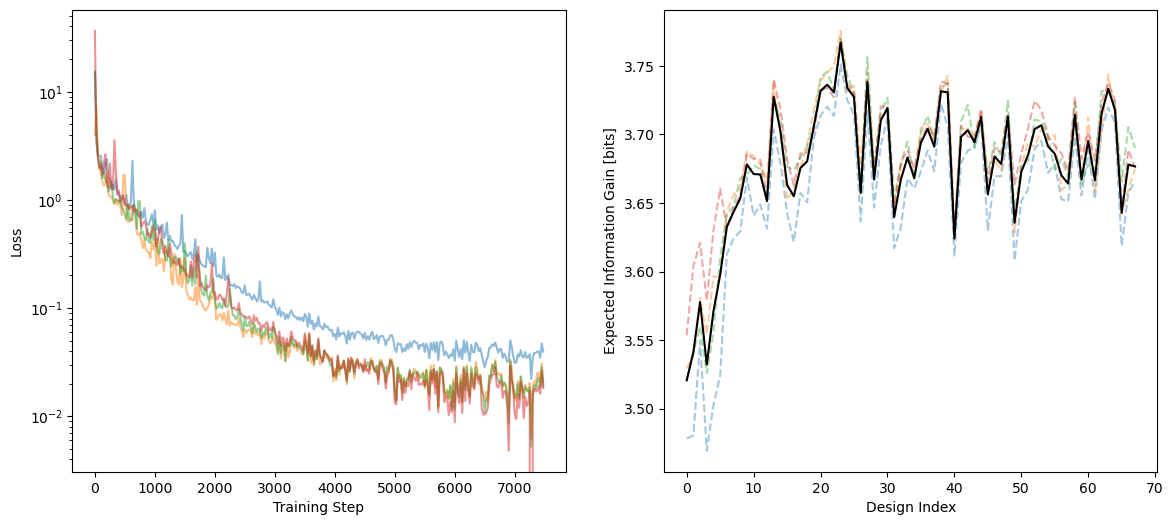

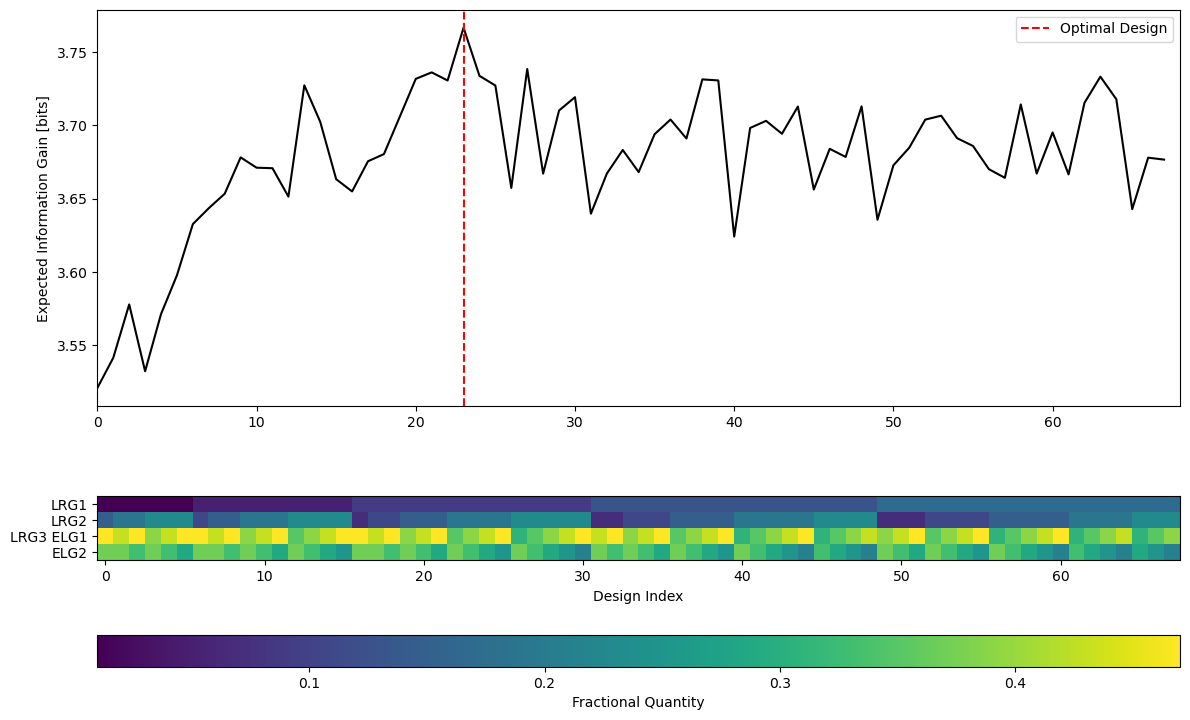

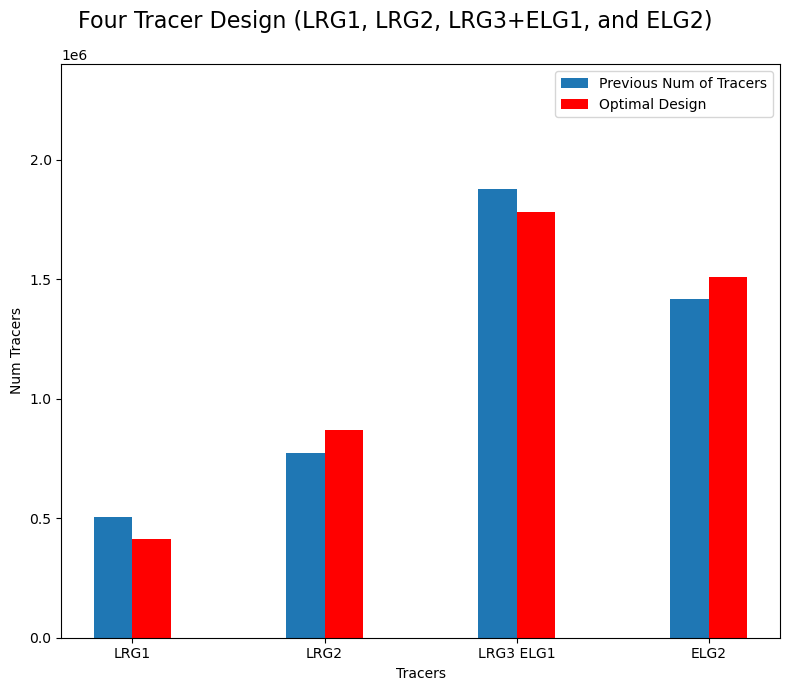

In [200]:
client = MlflowClient()
exp_name = '4_tracers_seed_steps'
exp_id = client.get_experiment_by_name(exp_name).experiment_id
run_ids = [run.info.run_id for run in client.search_runs(exp_id)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
var = 'seed'
run_ids = sorted(run_ids, key=lambda x: float(client.get_run(x).data.params[var]))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']
full_loss = []
all_eigs = []
for run_id in run_ids:
    loss_history = client.get_metric_history(run_id, 'loss')
    losses = [metric.value for metric in loss_history]
    full_loss.append(losses)
    steps = len(losses)
    color = colors.pop(0)
    artifact_uri = client.get_run(run_id).info.artifact_uri
    sigma = client.get_run(run_id).data.params[var]
    eigs = np.load(f"mlruns/{exp_id}/{run_id}/artifacts/eigs.npy")
    ax2.plot(eigs, label=f"{var}={sigma}", linestyle='--', color=color, alpha=0.4)
    all_eigs.append(eigs)
mean_eigs = np.array(all_eigs).mean(axis=0)
ax2.plot(mean_eigs, color='black', label='Mean')
loss = np.array(full_loss)
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']
for i, run_id in enumerate(run_ids):
    loss_history = client.get_metric_history(run_id, 'loss')
    losses = [metric.value for metric in loss_history]
    full_loss.append(losses)
    steps = len(losses)
    artifact_uri = client.get_run(run_id).info.artifact_uri
    sigma = client.get_run(run_id).data.params[var]
    ax1.plot(np.arange(steps)*25, loss[i,:]-loss.min(), alpha=0.5, color=colors.pop(0), label=f"{var}={sigma}")

ax1.set_xlabel("Training Step")
ax1.set_ylabel("Loss")
ax1.set_yscale('log')
ax2.set_xlabel("Design Index")
ax2.set_ylabel("Expected Information Gain [bits]")
plt.show()

run = client.get_run(run_id)
eigs = np.load(f"/home/ashandonay/bed/BED_examples/cosmology/mlruns/{run.info.experiment_id}/{run_id}/artifacts/eigs.npy")
designs = np.load(f"/home/ashandonay/bed/BED_examples/cosmology/mlruns/{run.info.experiment_id}/{run_id}/artifacts/design_eigs.npy")
fig, axs = plt.subplots(2, 1, figsize=(12, 8))
axs[0].plot(mean_eigs, color="black")
axs[0].set_xlim(0, len(eigs))
axs[0].axvline(eigs.argmax(), color='red', linestyle='--', label="Optimal Design")
axs[0].set_ylabel("Expected Information Gain [bits]")
axs[0].legend()
im = axs[1].imshow(designs.T)
axs[1].set_xlabel("Design Index")
axs[1].set_yticks(np.arange(len(eval(run.data.params["tracers"]))), eval(run.data.params["tracers"]))
# Create a divider for the existing axes instance
divider = make_axes_locatable(axs[1])
# Append a new axis for the colorbar at the bottom
cax = divider.append_axes("bottom", size="50%", pad=0.75)
# Create the colorbar
cbar = fig.colorbar(im, cax=cax, orientation='horizontal', label='Fractional Quantity')
# Adjust the width of the colorbar to be a quarter of the figure width
cax.set_position([0.375, cax.get_position().y0, 0.25, cax.get_position().height])
# Show the plot
plt.tight_layout()
plt.show()

top_eigs = mean_eigs.argsort()[-1:][::-1]
exp_id = client.get_experiment_by_name(exp_name).experiment_id
run_ids = [run.info.run_id for run in client.search_runs(exp_id)]
run_id = run_ids[0]
designs = np.load(f'/home/ashandonay/bed/BED_examples/cosmology/mlruns/{exp_id}/{run_id}/artifacts/design_eigs.npy')
top_designs = designs[top_eigs]

categories = eval(run.data.params["tracers"])
tot = desi_data.loc[desi_data["tracer"] == "LRG1", "num"].iloc[0] + desi_data.loc[desi_data["tracer"] == "LRG2", "num"].iloc[0] + desi_data.loc[desi_data["tracer"] == "LRG3 ELG1", "num"].iloc[0] + desi_data.loc[desi_data["tracer"] == "ELG2", "num"].iloc[0]
values1 = [desi_data.loc[desi_data["tracer"] == "LRG1", "num"].iloc[0], desi_data.loc[desi_data["tracer"] == "LRG2", "num"].iloc[0], desi_data.loc[desi_data["tracer"] == "LRG3 ELG1", "num"].iloc[0], desi_data.loc[desi_data["tracer"] == "ELG2", "num"].iloc[0]]  # Values for the first set of bars
values2 = tot*top_designs.squeeze()  # Values for the second set of bars

# Set the positions for the bars
x = np.arange(len(categories))  # the label locations
width = 0.2 # the width of the bars

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 7))
bars1 = ax.bar(x - width/2, values1, width, label='Previous Num of Tracers')
bars2 = ax.bar(x + width/2, values2, width, label='Optimal Design', color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Tracers')
ax.set_ylabel('Num Tracers')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylim(0, 2400000)
ax.legend()

# set super title
plt.suptitle("Four Tracer Design (LRG1, LRG2, LRG3+ELG1, and ELG2)", fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
            elif "kwargs" in constraint_names:
                constraint_names = list(self.names)
            for name in constraint_names:
                if name not in self.names and name != "idx" and name != "kwargs":
                    raise ValueError("constraint uses an invalid axis name: " + name)

In [ ]:
def Gaussian(x, mu, sigma):
    """Helper function to define a prior that is a Gaussian centered at mu with standard deviation sigma."""
    x = np.asarray(x)
    if not np.all(np.diff(x) > 0):
        raise ValueError("x must be monotonically increasing")
    y = np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    y /= np.sum(y)
    return y

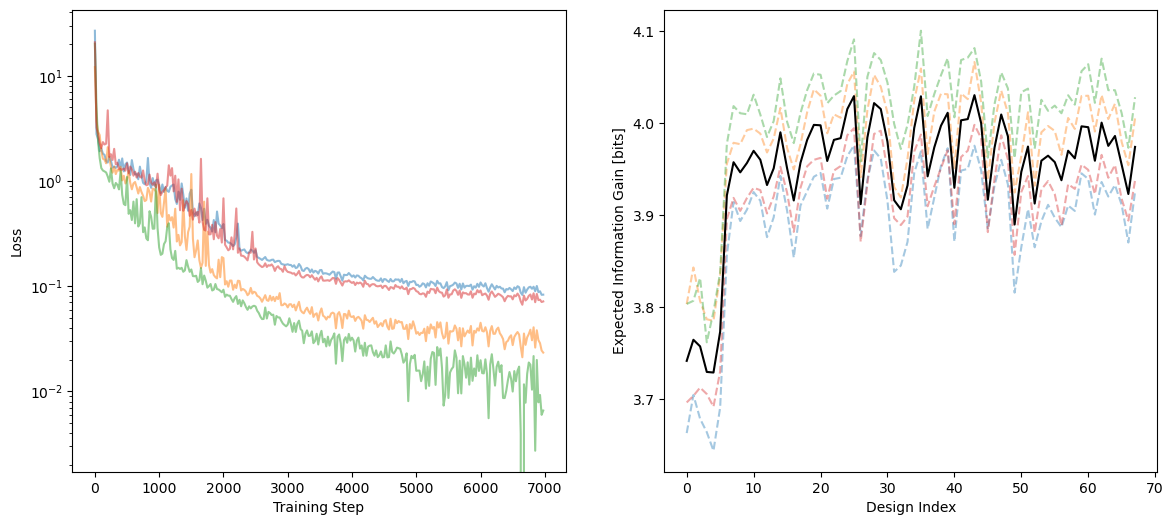

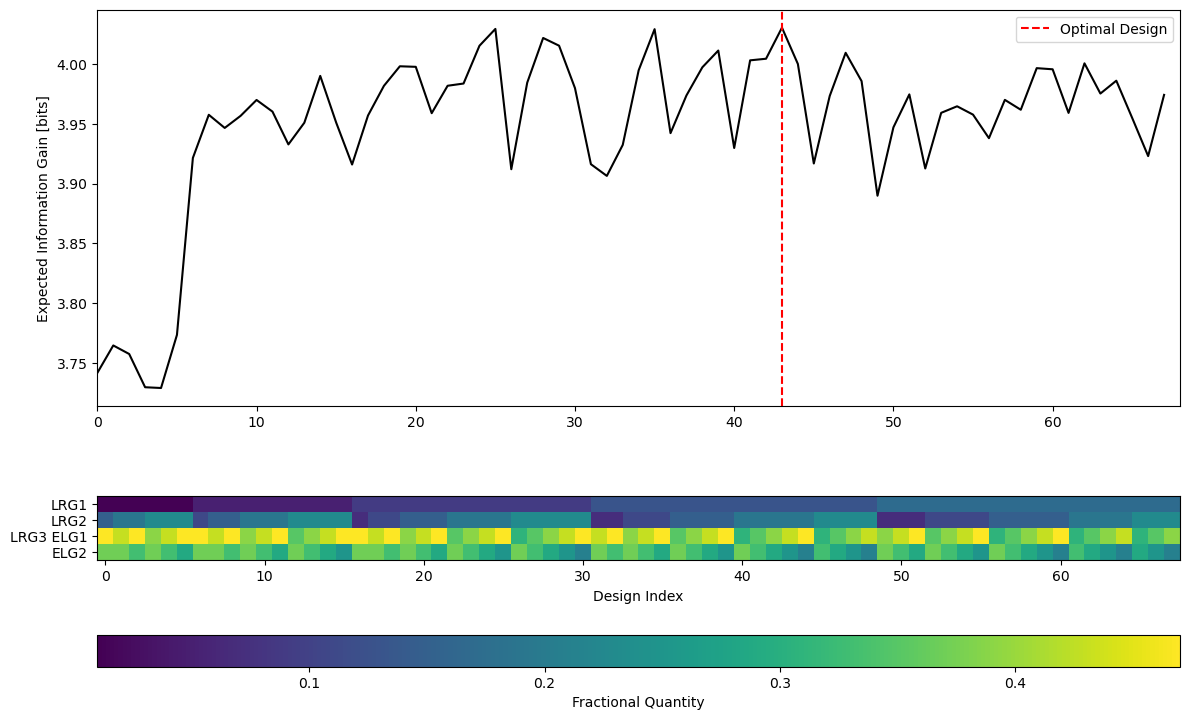

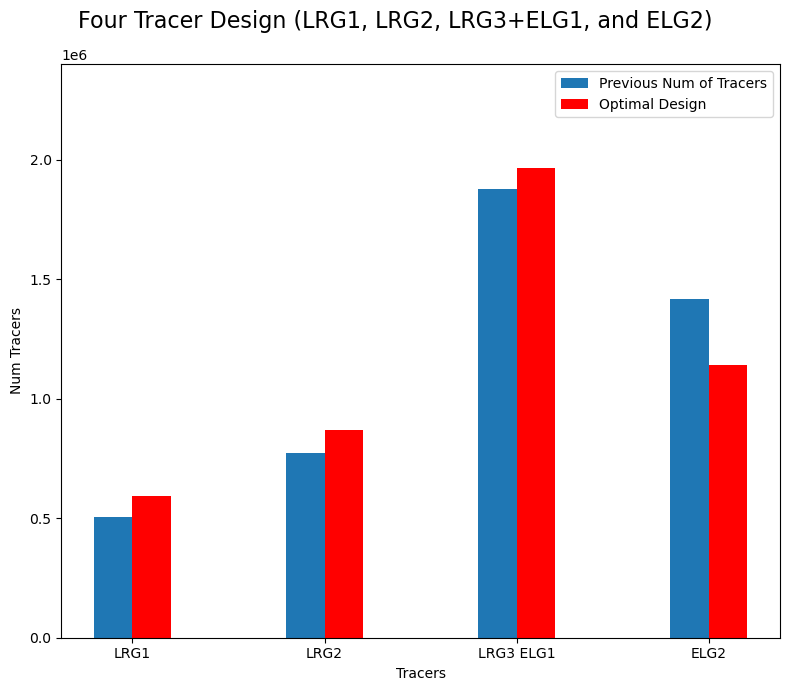

In [199]:
client = MlflowClient()
exp_name = '4_2D_tracers_seed_steps'
exp_id = client.get_experiment_by_name(exp_name).experiment_id
run_ids = [run.info.run_id for run in client.search_runs(exp_id)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
var = 'seed'
run_ids = sorted(run_ids, key=lambda x: float(client.get_run(x).data.params[var]))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']
full_loss = []
all_eigs = []
for run_id in run_ids:
    loss_history = client.get_metric_history(run_id, 'loss')
    losses = [metric.value for metric in loss_history]
    full_loss.append(losses)
    steps = len(losses)
    color = colors.pop(0)
    artifact_uri = client.get_run(run_id).info.artifact_uri
    sigma = client.get_run(run_id).data.params[var]
    eigs = np.load(f"mlruns/{exp_id}/{run_id}/artifacts/eigs.npy")
    ax2.plot(eigs, label=f"{var}={sigma}", linestyle='--', color=color, alpha=0.4)
    all_eigs.append(eigs)
mean_eigs = np.array(all_eigs).mean(axis=0)
ax2.plot(mean_eigs, color='black', label='Mean')
loss = np.array(full_loss)
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']
for i, run_id in enumerate(run_ids):
    loss_history = client.get_metric_history(run_id, 'loss')
    losses = [metric.value for metric in loss_history]
    full_loss.append(losses)
    steps = len(losses)
    artifact_uri = client.get_run(run_id).info.artifact_uri
    sigma = client.get_run(run_id).data.params[var]
    ax1.plot(np.arange(steps)*25, loss[i,:]-loss.min(), alpha=0.5, color=colors.pop(0), label=f"{var}={sigma}")

ax1.set_xlabel("Training Step")
ax1.set_ylabel("Loss")
ax1.set_yscale('log')
ax2.set_xlabel("Design Index")
ax2.set_ylabel("Expected Information Gain [bits]")
plt.show()

run = client.get_run(run_id)
eigs = np.load(f"/home/ashandonay/bed/BED_examples/cosmology/mlruns/{run.info.experiment_id}/{run_id}/artifacts/eigs.npy")
designs = np.load(f"/home/ashandonay/bed/BED_examples/cosmology/mlruns/{run.info.experiment_id}/{run_id}/artifacts/design_eigs.npy")
fig, axs = plt.subplots(2, 1, figsize=(12, 8))
axs[0].plot(mean_eigs, color="black")
axs[0].set_xlim(0, len(eigs))
axs[0].axvline(eigs.argmax(), color='red', linestyle='--', label="Optimal Design")
axs[0].set_ylabel("Expected Information Gain [bits]")
axs[0].legend()
im = axs[1].imshow(designs.T)
axs[1].set_xlabel("Design Index")
axs[1].set_yticks(np.arange(len(eval(run.data.params["tracers"]))), eval(run.data.params["tracers"]))
# Create a divider for the existing axes instance
divider = make_axes_locatable(axs[1])
# Append a new axis for the colorbar at the bottom
cax = divider.append_axes("bottom", size="50%", pad=0.75)
# Create the colorbar
cbar = fig.colorbar(im, cax=cax, orientation='horizontal', label='Fractional Quantity')
# Adjust the width of the colorbar to be a quarter of the figure width
cax.set_position([0.375, cax.get_position().y0, 0.25, cax.get_position().height])
# Show the plot
plt.tight_layout()
plt.show()

top_eigs = mean_eigs.argsort()[-1:][::-1]
exp_id = client.get_experiment_by_name(exp_name).experiment_id
run_ids = [run.info.run_id for run in client.search_runs(exp_id)]
run_id = run_ids[0]
designs = np.load(f'/home/ashandonay/bed/BED_examples/cosmology/mlruns/{exp_id}/{run_id}/artifacts/design_eigs.npy')
top_designs = designs[top_eigs]

categories = eval(run.data.params["tracers"])
tot = desi_data.loc[desi_data["tracer"] == "LRG1", "num"].iloc[0] + desi_data.loc[desi_data["tracer"] == "LRG2", "num"].iloc[0] + desi_data.loc[desi_data["tracer"] == "LRG3 ELG1", "num"].iloc[0] + desi_data.loc[desi_data["tracer"] == "ELG2", "num"].iloc[0]
values1 = [desi_data.loc[desi_data["tracer"] == "LRG1", "num"].iloc[0], desi_data.loc[desi_data["tracer"] == "LRG2", "num"].iloc[0], desi_data.loc[desi_data["tracer"] == "LRG3 ELG1", "num"].iloc[0], desi_data.loc[desi_data["tracer"] == "ELG2", "num"].iloc[0]]  # Values for the first set of bars
values2 = tot*top_designs.squeeze()  # Values for the second set of bars

# Set the positions for the bars
x = np.arange(len(categories))  # the label locations
width = 0.2 # the width of the bars

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 7))
bars1 = ax.bar(x - width/2, values1, width, label='Previous Num of Tracers')
bars2 = ax.bar(x + width/2, values2, width, label='Optimal Design', color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Tracers')
ax.set_ylabel('Num Tracers')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylim(0, 2400000)
ax.legend()

# set super title
plt.suptitle("Four Tracer Design (LRG1, LRG2, LRG3+ELG1, and ELG2)", fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

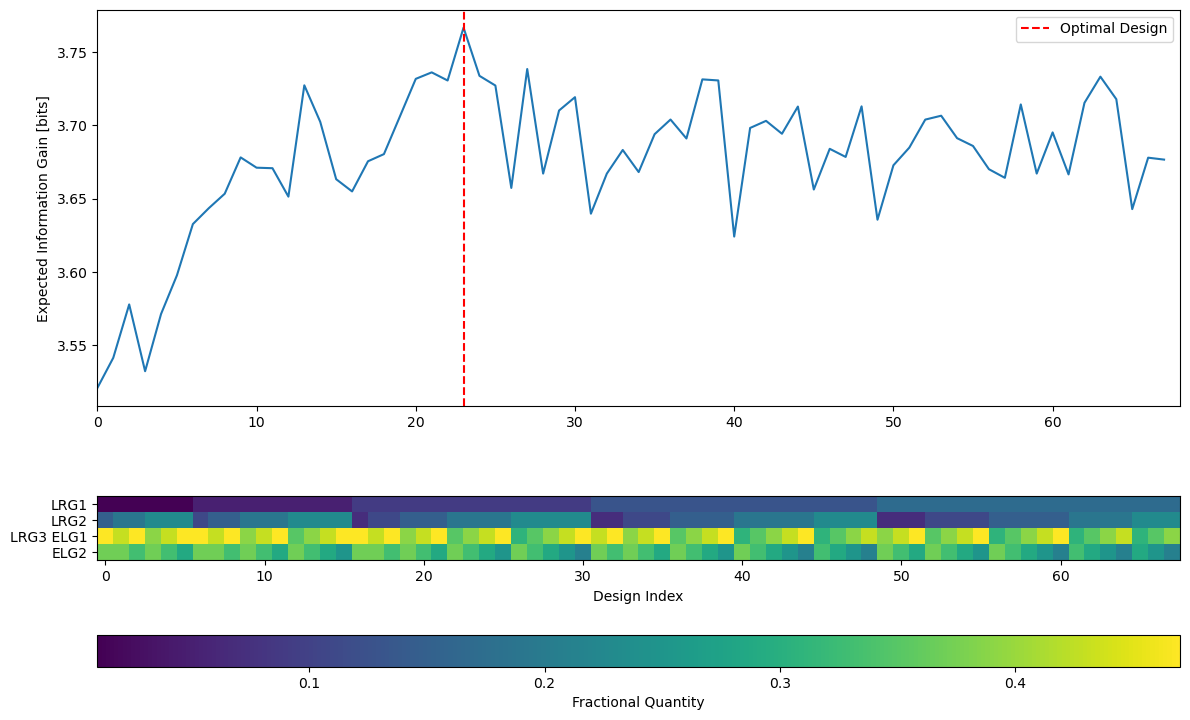

In [187]:
client = MlflowClient()

run = client.get_run(run_id)
eigs = np.load(f"/home/ashandonay/bed/BED_examples/cosmology/mlruns/{run.info.experiment_id}/{run_id}/artifacts/eigs.npy")
designs = np.load(f"/home/ashandonay/bed/BED_examples/cosmology/mlruns/{run.info.experiment_id}/{run_id}/artifacts/design_eigs.npy")
fig, axs = plt.subplots(2, 1, figsize=(12, 8))
axs[0].plot(mean_eigs)
axs[0].set_xlim(0, len(eigs))
axs[0].axvline(eigs.argmax(), color='red', linestyle='--', label="Optimal Design")
axs[0].set_ylabel("Expected Information Gain [bits]")
axs[0].legend()
im = axs[1].imshow(designs.T)
axs[1].set_xlabel("Design Index")
axs[1].set_yticks(np.arange(len(eval(run.data.params["tracers"]))), eval(run.data.params["tracers"]))
# Create a divider for the existing axes instance
divider = make_axes_locatable(axs[1])
# Append a new axis for the colorbar at the bottom
cax = divider.append_axes("bottom", size="50%", pad=0.75)
# Create the colorbar
cbar = fig.colorbar(im, cax=cax, orientation='horizontal', label='Fractional Quantity')
# Adjust the width of the colorbar to be a quarter of the figure width
cax.set_position([0.375, cax.get_position().y0, 0.25, cax.get_position().height])
# Show the plot
plt.tight_layout()
plt.show()

In [92]:
client = MlflowClient()
exp_name = "4_tracers_seed"
exp_id = client.get_experiment_by_name(exp_name).experiment_id
run_ids = [run.info.run_id for run in client.search_runs(exp_id)]

plt.figure()
var = 'seed'
run_ids = sorted(run_ids, key=lambda x: float(client.get_run(x).data.params[var]))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
full_loss = []
for run_id in run_ids:
    loss_history = client.get_metric_history(run_id, 'loss')
    losses = [metric.value for metric in loss_history]
    full_loss.append(losses)
    steps = len(losses)
    color = colors.pop(0)
    artifact_uri = client.get_run(run_id).info.artifact_uri
    sigma = client.get_run(run_id).data.params[var]
    #eigs = np.load(f"mlruns/{exp_id}/{run_id}/artifacts/eigs.npy")
    #ax2.plot(eigs, alpha=0.7, label=f"{var}={sigma}", linestyle='--', color=color)
    brute_force_eigs = np.load(f"mlruns/{exp_id}/{run_id}/artifacts/brute_force_eigs.npy")
    plt.plot(brute_force_eigs.squeeze(), color=color, label=f"{var}={sigma}")

plt.xlabel("Design (redshift)")
plt.ylabel("Expected Information Gain [bits]")
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'mlruns/812880847947314550/890bc56b15024662b392a738363656a2/artifacts/brute_force_eigs.npy'

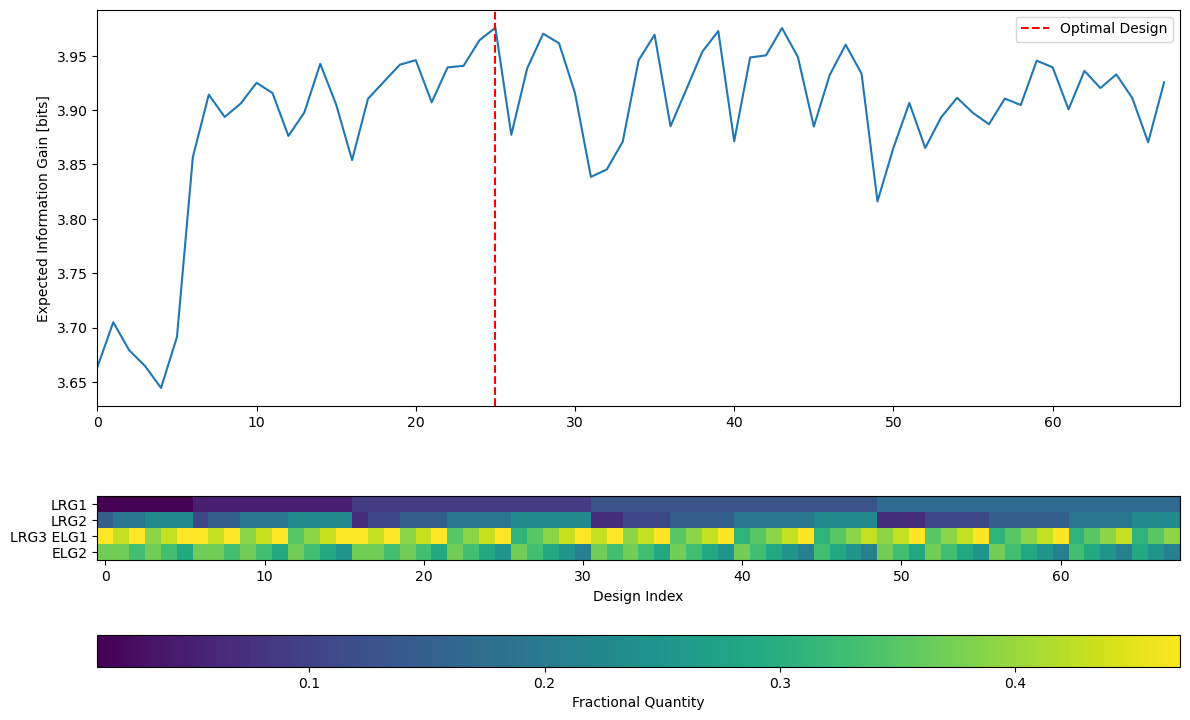

In [164]:
run_id = 'a91c9ee2c67543adbbf7d085487cbfe0'
client = MlflowClient()

run = client.get_run(run_id)
eigs = np.load(f"/home/ashandonay/bed/BED_examples/cosmology/mlruns/{run.info.experiment_id}/{run_id}/artifacts/eigs.npy")
designs = np.load(f"/home/ashandonay/bed/BED_examples/cosmology/mlruns/{run.info.experiment_id}/{run_id}/artifacts/design_eigs.npy")
fig, axs = plt.subplots(2, 1, figsize=(12, 8))
axs[0].plot(eigs)
axs[0].set_xlim(0, len(eigs))
axs[0].axvline(eigs.argmax(), color='red', linestyle='--', label="Optimal Design")
axs[0].set_ylabel("Expected Information Gain [bits]")
axs[0].legend()
im = axs[1].imshow(designs.T)
axs[1].set_xlabel("Design Index")
axs[1].set_yticks(np.arange(len(eval(run.data.params["tracers"]))), eval(run.data.params["tracers"]))
# Create a divider for the existing axes instance
divider = make_axes_locatable(axs[1])
# Append a new axis for the colorbar at the bottom
cax = divider.append_axes("bottom", size="50%", pad=0.75)
# Create the colorbar
cbar = fig.colorbar(im, cax=cax, orientation='horizontal', label='Fractional Quantity')
# Adjust the width of the colorbar to be a quarter of the figure width
cax.set_position([0.375, cax.get_position().y0, 0.25, cax.get_position().height])
# Show the plot
plt.tight_layout()
plt.show()

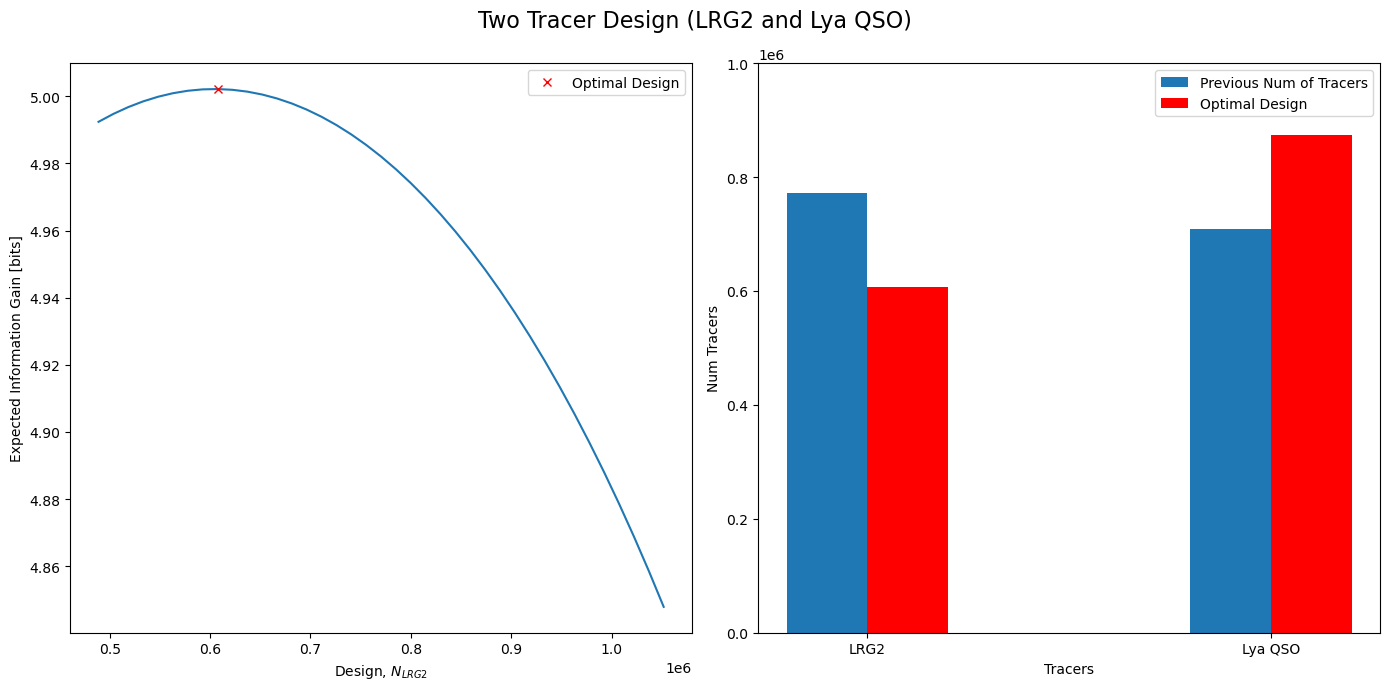

In [121]:
eigs = np.load('/home/ashandonay/bed/BED_examples/cosmology/mlruns/915317822116182339/d116061dafa54c6ca36b61a381f9316a/artifacts/brute_force_eigs.npy')
designs = np.load('/home/ashandonay/bed/BED_examples/cosmology/mlruns/915317822116182339/d116061dafa54c6ca36b61a381f9316a/artifacts/designs.npy')
tot = desi_data.loc[desi_data["tracer"] == "LRG2", "num"].iloc[0] + desi_data.loc[desi_data["tracer"] == "Lya QSO", "num"].iloc[0]
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
ax[0].plot(tot*designs[0], eigs)
# place a marker at the maximum
ax[0].plot(tot*designs[0, np.where(eigs == eigs.max())][0], eigs.max(), 'rx', label="Optimal Design")
ax[0].set_xlabel("Design, $N_{LRG2}$")
ax[0].set_ylabel("Expected Information Gain [bits]")
ax[0].legend()

# Define the categories and values
categories = ['LRG2', 'Lya QSO']
values1 = [desi_data.loc[desi_data["tracer"] == "LRG2", "num"].iloc[0], desi_data.loc[desi_data["tracer"] == "Lya QSO", "num"].iloc[0]]  # Values for the first set of bars
values2 = [int(tot*designs[0, 8]), int(tot*designs[1, 8])]  # Values for the second set of bars

# Set the positions for the bars
x = np.arange(len(categories))  # the label locations
width = 0.2 # the width of the bars

bars1 = ax[1].bar(x - width/2, values1, width, label='Previous Num of Tracers')
bars2 = ax[1].bar(x + width/2, values2, width, label='Optimal Design', color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1].set_xlabel('Tracers')
ax[1].set_ylabel('Num Tracers')
ax[1].set_xticks(x)
ax[1].set_xticklabels(categories)
ax[1].set_ylim(0, 1000000)
ax[1].legend()

# set super title
plt.suptitle("Two Tracer Design (LRG2 and Lya QSO)", fontsize=16)
plt.tight_layout()
plt.show()

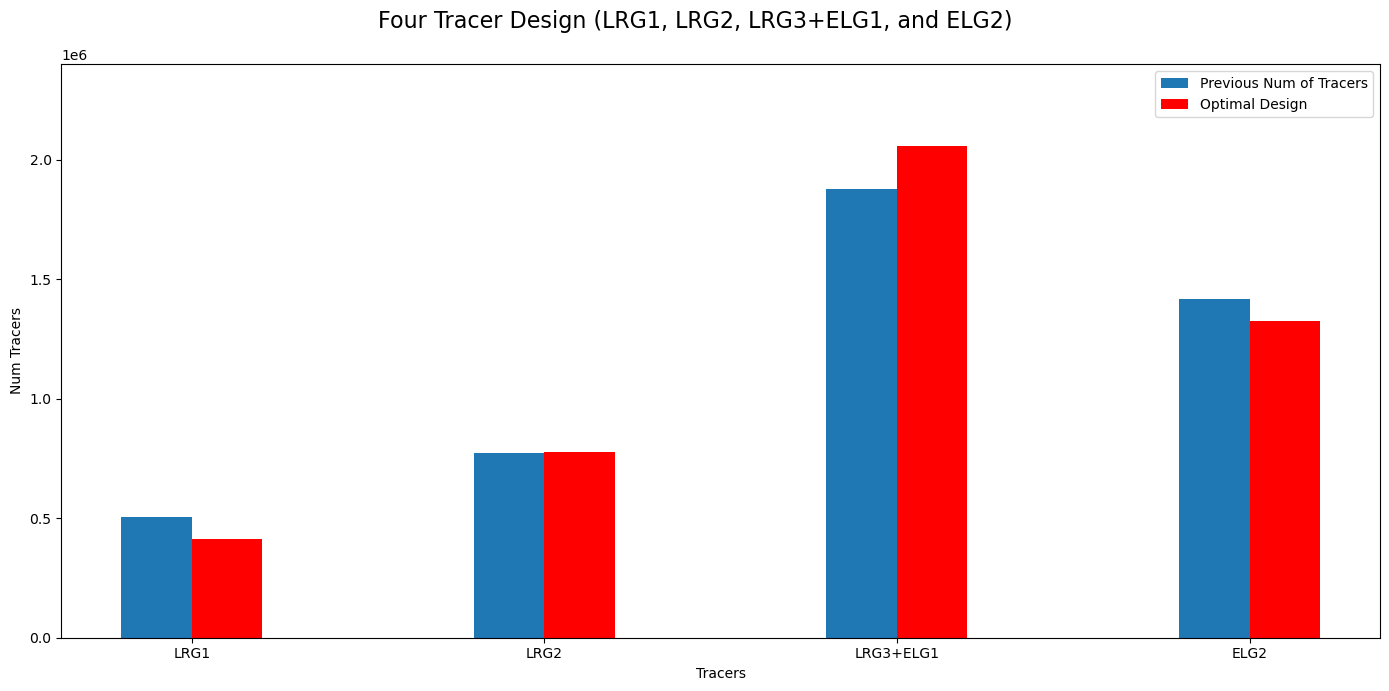

In [124]:
eigs = np.load('/home/ashandonay/bed/BED_examples/cosmology/mlruns/147584083322716898/e075af547c6149c2b15e05b0a2be461e/artifacts/eigs.npy')
designs = np.load('/home/ashandonay/bed/BED_examples/cosmology/mlruns/147584083322716898/e075af547c6149c2b15e05b0a2be461e/artifacts/design_eigs.npy')

optimal_design = designs[np.where(eigs == eigs.max())][0]
# same bar chart as above but with 4 categories
# Define the categories and values
categories = ['LRG1', 'LRG2', 'LRG3+ELG1', 'ELG2']
tot = desi_data.loc[desi_data["tracer"] == "LRG1", "num"].iloc[0] + desi_data.loc[desi_data["tracer"] == "LRG2", "num"].iloc[0] + desi_data.loc[desi_data["tracer"] == "LRG3 ELG1", "num"].iloc[0] + desi_data.loc[desi_data["tracer"] == "ELG2", "num"].iloc[0]
values1 = [desi_data.loc[desi_data["tracer"] == "LRG1", "num"].iloc[0], desi_data.loc[desi_data["tracer"] == "LRG2", "num"].iloc[0], desi_data.loc[desi_data["tracer"] == "LRG3 ELG1", "num"].iloc[0], desi_data.loc[desi_data["tracer"] == "ELG2", "num"].iloc[0]]  # Values for the first set of bars
values2 = tot*optimal_design  # Values for the second set of bars

# Set the positions for the bars
x = np.arange(len(categories))  # the label locations
width = 0.2 # the width of the bars

# Create the bar chart
fig, ax = plt.subplots(figsize=(14, 7))
bars1 = ax.bar(x - width/2, values1, width, label='Previous Num of Tracers')
bars2 = ax.bar(x + width/2, values2, width, label='Optimal Design', color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Tracers')
ax.set_ylabel('Num Tracers')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylim(0, 2400000)
ax.legend()

# set super title
plt.suptitle("Four Tracer Design (LRG1, LRG2, LRG3+ELG1, and ELG2)", fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()
